In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def bisectionRootFind(a, b, g, maxIterations = 10, guess = None, samples = None, debug = False):
    # The first check, if g(a) * g(b) > 0, there is no root
    atA = g(a) if samples is None else g(samples, a)
    atB = g(b) if samples is None else g(samples, b)
    if debug == True: print("atA:{}; atB:{}".format(atA, atB))
    if atA * atB > 0.0:
        raise ValueError("No 0 in [{}, {}]".format(a, b))
        
    # Generate a guess by means of
    #  x(t) = (1/2)*(g(a) * g(b))
    nextX = lambda: (1/2)*(a + b)

    found = False
    iteration = 0
    x_t = nextX() if guess is None else guess
    while iteration < maxIterations:
    
        # Ok, the checks are now done, perform the algorithm
        candidateVal = g(x_t) if samples is None else g(samples, x_t)

        # using default values for isclose() as this defaults to a relative
        # tolerance of 1*10^-9 and an absolute tolerance of 0.0
        if np.isclose(candidateVal, 0.0):
            found = True
            break
        
        # We haven't found a root, so shrink the interval
        atA = g(a) if samples is None else g(samples, a)
        if atA * candidateVal <= 0:
            b = x_t
        else:
            a = x_t

        x_t = nextX()
        iteration += 1

    if found:
        # This little bit of apparent craziness makes quirks with floating point
        # representation look correct when we look at it.
        root = abs(x_t) if x_t == -0.0 else x_t
        return (root, iteration)
    else:
        raise RuntimeError("Unable to find a root for g in [{}, {}]".format(a, b))

In [2]:
# First requirement, find the root of g via g'(x) = 0.  g'(x) = (1 + (1/x) - log(x))/(1 + x)^2
gPrime = lambda x: (1 + (1/x) - np.log(x))/(1 + x)**2
retTuple = bisectionRootFind(1, 5, gPrime, maxIterations = 25)
print("x = {:.5f} maximizes g(x) = log(x)/(1+x) on [1, 5]".format(retTuple[0]))
print("Iterations required: {}".format(retTuple[1]))

x = 3.59112 maximizes g(x) = log(x)/(1+x) on [1, 5]
Iterations required: 19


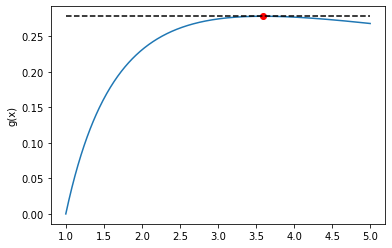

In [3]:
# Second requirement, plot g(x) = log(x)/(1 + x)
x = np.linspace(1, 5, 500)
g = lambda x: np.log(x)/(1 + x)
y = g(x)
tangent = [g(retTuple[0]) for i in range(len(x))]
plt.plot(x, y, retTuple[0], g(retTuple[0]), 'ro', x, tangent, 'k--')
plt.ylabel("g(x)")
plt.show()

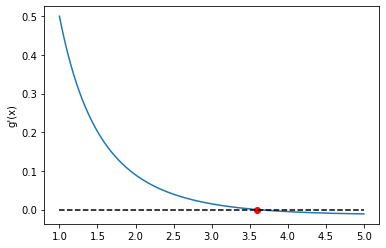

In [4]:
# Third requirement, plot g'(x) as in textbook
devY = gPrime(x)
zeros = [0 for x in range(len(devY))]
plt.plot(x, devY, retTuple[0], gPrime(retTuple[0]), 'ro', x, zeros, 'k--')
plt.ylabel("g'(x)")
plt.show()